<a href="https://colab.research.google.com/github/nizarihsan/PCD/blob/main/Aplikasi_Pengolahan_Citra_Untuk_Peningkatan_Deteksi_Tepi_Melalui_Segmentasi_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving image.jpg to image (3).jpg


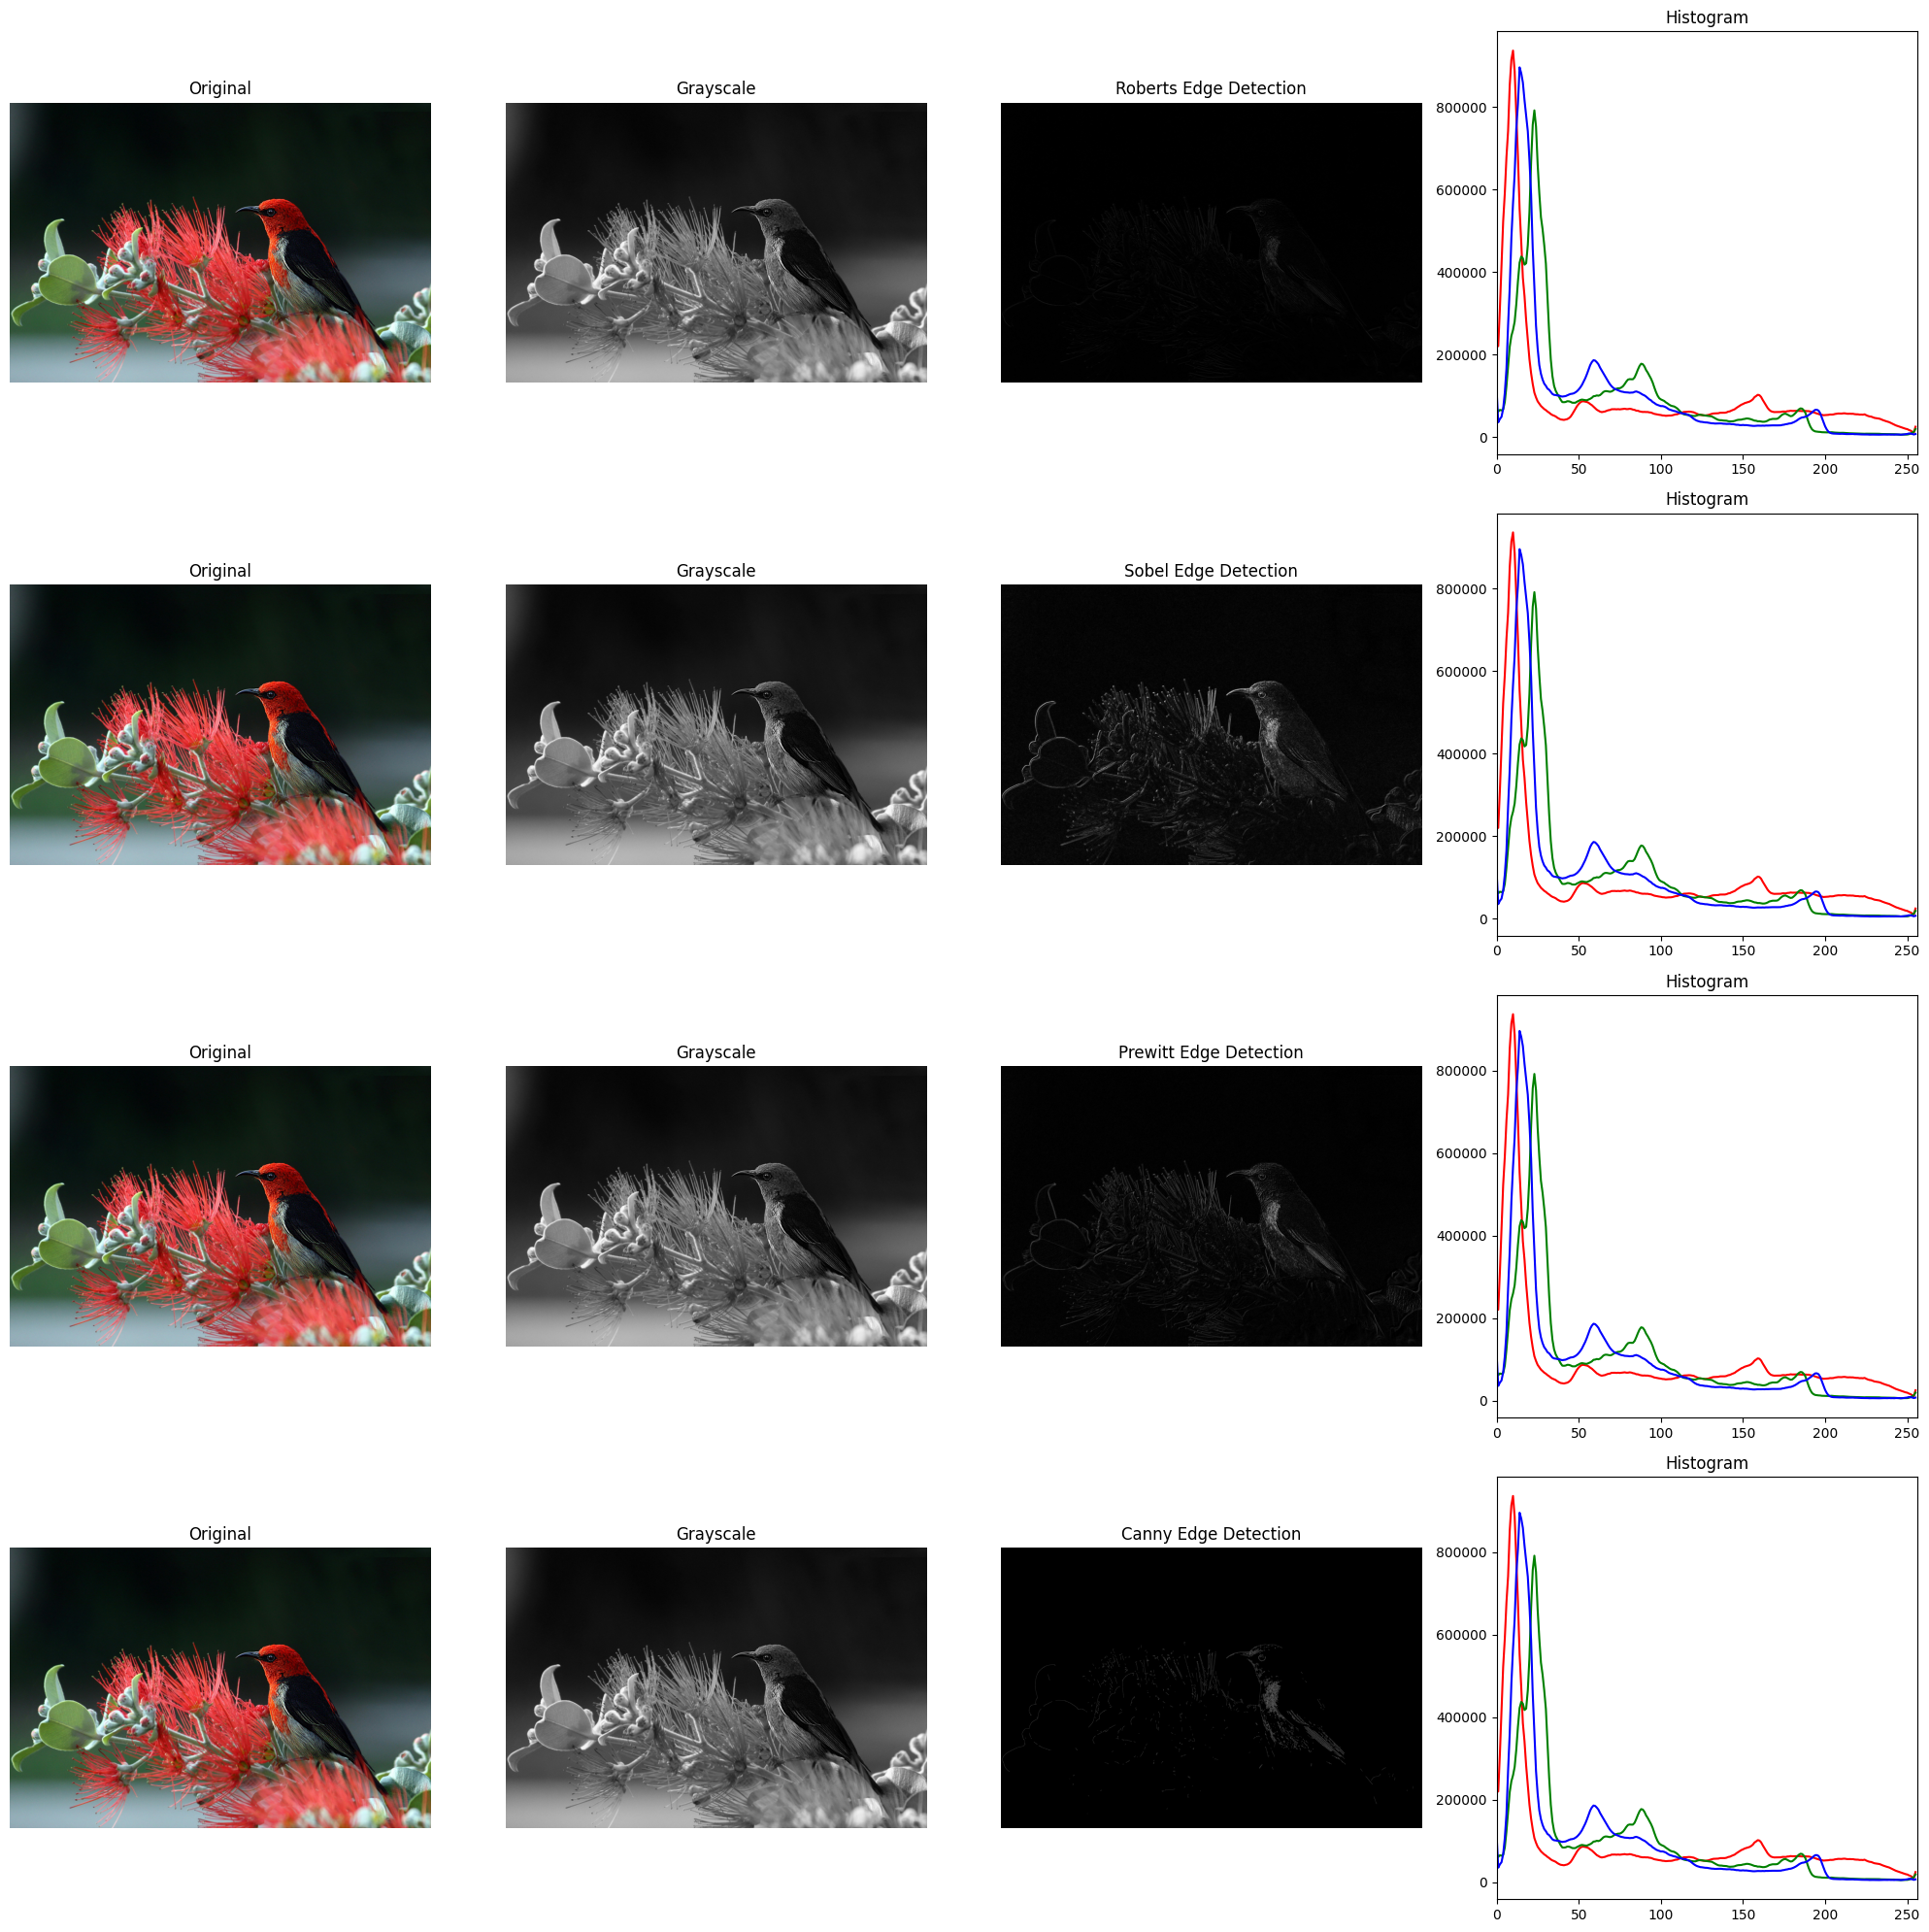

In [4]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk metode Roberts
def apply_roberts(image):
    kernelx = np.array([[1, 0], [0, -1]])
    kernely = np.array([[0, 1], [-1, 0]])
    x = cv2.filter2D(image, -1, kernelx)
    y = cv2.filter2D(image, -1, kernely)
    return cv2.convertScaleAbs(x + y)

# Fungsi untuk metode Sobel
def apply_sobel(image):
    x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.convertScaleAbs(x + y)

# Fungsi untuk metode Prewitt
def apply_prewitt(image):
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    x = cv2.filter2D(image, -1, kernelx)
    y = cv2.filter2D(image, -1, kernely)
    return cv2.convertScaleAbs(x + y)

# Fungsi untuk metode Canny
def apply_canny(image):
    return cv2.Canny(image, 100, 200)

# Fungsi untuk menampilkan histogram
def plot_histogram(image, ax, title):
    if len(image.shape) == 3:  # RGB image
        colors = ('r', 'g', 'b')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            ax.plot(hist, color=color)
    else:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        ax.plot(hist, color='black')
    ax.set_title(title)
    ax.set_xlim([0, 256])

# Fungsi utama untuk memproses citra
def process_image(image_path):
    # Memuat citra
    original_image = Image.open(image_path)

    # Konversi ke grayscale
    gray_image = np.array(original_image.convert('L'))

    # Aplikasi metode deteksi tepi
    roberts_result = apply_roberts(gray_image)
    sobel_result = apply_sobel(gray_image)
    prewitt_result = apply_prewitt(gray_image)
    canny_result = apply_canny(gray_image)

    # Menampilkan hasil
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.ravel()

    # Judul untuk masing-masing metode
    titles = ["Original", "Grayscale", "Roberts Edge Detection", "Histogram",
              "Original", "Grayscale", "Sobel Edge Detection", "Histogram",
              "Original", "Grayscale", "Prewitt Edge Detection", "Histogram",
              "Original", "Grayscale", "Canny Edge Detection", "Histogram"]

    # Gambar yang akan ditampilkan
    images = [np.array(original_image), gray_image, roberts_result, gray_image,
              np.array(original_image), gray_image, sobel_result, gray_image,
              np.array(original_image), gray_image, prewitt_result, gray_image,
              np.array(original_image), gray_image, canny_result, gray_image]

    # Loop untuk menampilkan gambar dan histogram
    for i in range(len(images)):
        if (i % 4) == 3:  # Histogram
            plot_histogram(images[i - 3], axes[i], titles[i])
        else:
            cmap = None if len(images[i].shape) == 3 else 'gray'
            axes[i].imshow(images[i], cmap=cmap)
            axes[i].set_title(titles[i])
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Upload file menggunakan Google Colab
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename
    process_image(image_path)


# Penjelasan Program Deteksi Tepi dengan Beberapa Metode

Program ini merupakan aplikasi untuk mendeteksi tepi pada citra (gambar) menggunakan empat metode deteksi tepi yang berbeda, yaitu **Roberts**, **Sobel**, **Prewitt**, dan **Canny**. Selain itu, program ini juga menampilkan histogram dari citra untuk memberikan informasi visual terkait distribusi intensitas piksel.

## 1. **Import Libraries**
Program ini menggunakan beberapa library untuk pemrosesan citra dan visualisasi:

- **`cv2`**: Library OpenCV yang digunakan untuk pemrosesan citra, seperti deteksi tepi dan manipulasi gambar.
- **`numpy`**: Digunakan untuk melakukan operasi matriks dan array, seperti pembuatan kernel konvolusi.
- **`PIL` (Python Imaging Library)**: Digunakan untuk memuat gambar dan mengonversinya ke format yang diperlukan (misalnya, grayscale).
- **`matplotlib.pyplot`**: Digunakan untuk menampilkan gambar dan grafik, seperti histogram.
- **`google.colab.files`**: Digunakan untuk mengupload file dari komputer lokal ke lingkungan Google Colab.

## 2. **Metode Deteksi Tepi**
Program ini memiliki empat metode deteksi tepi yang diterapkan pada citra grayscale, yaitu:

### a. **Roberts**
Menggunakan dua kernel konvolusi (kernelx dan kernely) untuk menghitung gradien citra pada arah horizontal dan vertikal, kemudian menggabungkan keduanya.

### b. **Sobel**
Menggunakan filter Sobel untuk mendeteksi gradien pada arah horizontal dan vertikal. Hasilnya digabungkan dan dikonversi menjadi citra akhir.

### c. **Prewitt**
Mirip dengan metode Roberts, tetapi menggunakan kernel 3x3 untuk menghitung gradien dalam arah horizontal dan vertikal. Hasilnya digabungkan dan dikonversi menjadi citra akhir.

### d. **Canny**
Menggunakan deteksi tepi Canny, yang melibatkan beberapa langkah pemrosesan citra, termasuk pengaburan Gaussian dan deteksi tepi menggunakan ambang batas ganda.

## 3. **Fungsi `plot_histogram`**
Fungsi ini digunakan untuk menampilkan histogram distribusi intensitas piksel dari citra, baik citra berwarna (RGB) maupun grayscale. Histogram menggambarkan frekuensi setiap intensitas piksel dalam citra.

## 4. **Fungsi `process_image`**
Fungsi ini menerima path gambar (misalnya, yang di-upload oleh pengguna), kemudian memuat gambar tersebut menggunakan **PIL**.

### Langkah-langkah dalam `process_image`:
1. **Memuat Gambar**: Gambar yang di-upload dimuat menggunakan PIL.
2. **Konversi ke Grayscale**: Gambar yang dimuat diubah menjadi citra grayscale karena metode deteksi tepi bekerja lebih baik pada gambar monokrom.
3. **Aplikasi Deteksi Tepi**: Fungsi ini kemudian menerapkan metode Roberts, Sobel, Prewitt, dan Canny pada citra grayscale untuk mendeteksi tepi.
4. **Menampilkan Gambar dan Histogram**: Program menampilkan hasil gambar untuk setiap metode deteksi tepi, serta histogram intensitas piksel untuk citra asli, grayscale, dan hasil deteksi tepi.

## 5. **Google Colab File Upload**
Program ini menggunakan fitur Google Colab untuk mengupload gambar dari komputer pengguna. Setelah gambar di-upload, program akan memanggil fungsi `process_image` untuk memproses gambar tersebut.

## 6. **Menampilkan Hasil**
Program ini menampilkan empat jenis gambar untuk setiap metode:
1. **Citra Asli**
2. **Citra Grayscale**
3. **Hasil Deteksi Tepi** (Roberts, Sobel, Prewitt, Canny)
4. **Histogram** dari citra grayscale dan hasil deteksi tepi

# Analisis Deteksi Tepi pada Gambar

## 1. **Original (Gambar Asli)**
- Gambar asli pada kedua hasil merupakan gambar berwarna tanpa modifikasi.
- **Histogram**: Menunjukkan distribusi intensitas untuk tiga channel warna utama:
  - Garis merah: channel merah.
  - Garis hijau: channel hijau.
  - Garis biru: channel biru.

---

## 2. **Grayscale (Citra Grayscale)**
- Gambar asli diubah menjadi skala abu-abu, di mana informasi warna dikonversi menjadi intensitas cahaya.
- **Histogram**: Hanya memiliki satu distribusi intensitas karena semua channel warna digabungkan menjadi satu.

---

## 3. **Roberts Edge Detection (Deteksi Tepi dengan Operator Roberts)**
- **Deskripsi**: Metode ini mendeteksi tepi berdasarkan perubahan intensitas diagonal antar piksel.
- **Hasil**:
  - Menunjukkan tepi sederhana dan fokus pada detail kecil atau transisi intensitas yang tajam.
  - Cocok untuk mendeteksi detail kecil.
- **Histogram**: Menunjukkan distribusi intensitas yang umumnya bernilai rendah, sensitif terhadap noise.

---

## 4. **Sobel Edge Detection (Deteksi Tepi dengan Operator Sobel)**
- **Deskripsi**: Menggunakan gradien intensitas dalam dua arah (horizontal dan vertikal) untuk mendeteksi tepi.
- **Hasil**:
  - Menunjukkan tepi yang lebih tebal dan jelas dibandingkan Roberts.
  - Cocok untuk mendeteksi objek besar.
- **Histogram**: Memiliki distribusi intensitas yang lebih tinggi, mencerminkan tepi yang lebih tajam.

---

## 5. **Prewitt Edge Detection (Deteksi Tepi dengan Operator Prewitt)**
- **Deskripsi**: Mirip dengan Sobel, tetapi menggunakan bobot gradien tetap, menghasilkan deteksi tepi yang lebih halus.
- **Hasil**:
  - Menunjukkan tepi yang lebih lembut dibandingkan Sobel.
  - Cocok untuk gambar dengan noise rendah atau deteksi tepi sederhana.
- **Histogram**: Distribusi intensitas mirip dengan Sobel tetapi kurang menonjol.

---

## 6. **Canny Edge Detection (Deteksi Tepi dengan Operator Canny)**
- **Deskripsi**: Metode paling kompleks dan akurat, menggunakan langkah-langkah berikut:
  - Pemfilteran Gaussian untuk mengurangi noise.
  - Menghitung gradien intensitas.
  - Menerapkan ambang batas ganda untuk mendeteksi tepi yang signifikan.
- **Hasil**:
  - Menunjukkan tepi yang lebih terstruktur dan detail dibandingkan metode lainnya.
  - Cocok untuk analisis gambar dengan latar belakang kompleks.
- **Histogram**: Distribusi intensitas yang lebih fokus, mencerminkan hasil deteksi tepi yang tajam.

---

## **Kesimpulan**
- **Roberts**: Cocok untuk detail kecil dengan transisi intensitas cepat.
- **Sobel**: Menghasilkan tepi yang lebih tebal, cocok untuk mendeteksi objek besar.
- **Prewitt**: Menawarkan deteksi sederhana dengan hasil yang halus.
- **Canny**: Unggul dalam akurasi dan struktur tepi, ideal untuk aplikasi yang membutuhkan ketelitian tinggi.

Setiap metode memiliki keunggulan masing-masing tergantung pada kebutuhan aplikasi, seperti mendeteksi detail halus, tepi besar, atau struktur kompleks.

Program ini memberikan cara yang komprehensif untuk melihat bagaimana citra diproses menggunakan berbagai metode deteksi tepi. Dengan menampilkan gambar dan histogram, pengguna dapat lebih mudah menganalisis perubahan yang terjadi setelah penerapan setiap metode deteksi tepi.


### Tampilan Gambar dan Histogram
- Gambar ditampilkan menggunakan `imshow` dengan pilihan warna **`gray`** untuk citra grayscale.
- Histogram ditampilkan di bawah gambar untuk setiap deteksi tepi.